In [774]:
#importing lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [775]:
dataset0 = pd.read_csv("bank.csv")

In [776]:
dataset0.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [777]:
dataset0.shape

(11162, 17)

In [778]:
dataset0.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Features balance is highly distributed whereas duration and pdays are moderately distributed.

In [779]:
categorical = dataset0.describe(include = "object")
categorical

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


Above 2 table hints there are no missing values as total no. of entries is same (11162). <br>
Categorical features: 
* job, marital, education,contact,month and poutcome are multi class features  
* default, housing, loan, deposit are binary features

In [780]:
# Categorical unique values
for col in categorical.columns:
    print("Unique Values of %s " %col )
    print(dataset0[col].value_counts())
    print("\n")

Unique Values of job 
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


Unique Values of marital 
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


Unique Values of education 
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


Unique Values of default 
no     10994
yes      168
Name: default, dtype: int64


Unique Values of housing 
no     5881
yes    5281
Name: housing, dtype: int64


Unique Values of loan 
no     9702
yes    1460
Name: loan, dtype: int64


Unique Values of contact 
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64


Unique Values of month 
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb    

This gives a brief introduction to categorical features, by listing out the unique entries(values) and their numbers. <br>
Features like job, education, contact, poutcome have unknown values and shall be treated later

In [781]:
dataset0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


All columns have 11162 non-null entries which strengthens our assumption of no missing values

In [782]:
dataset0.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

This confirmed that there are no missing values.

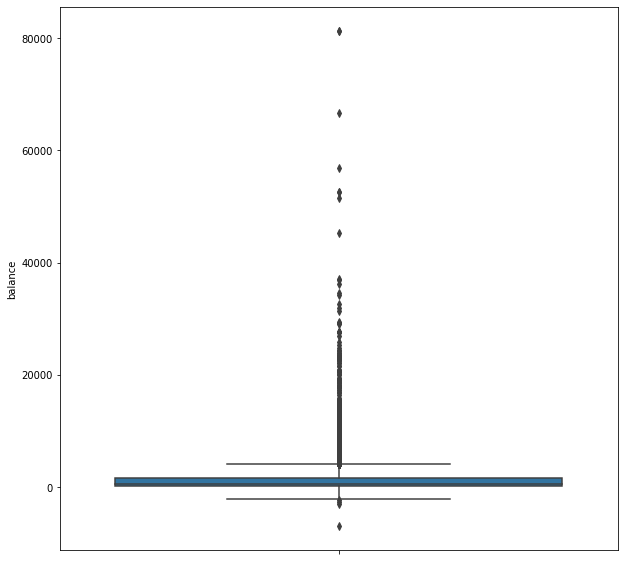

In [783]:
figure =plt.figure(figsize = (10,10))

sns.boxplot(y = dataset0.balance)
plt.show()

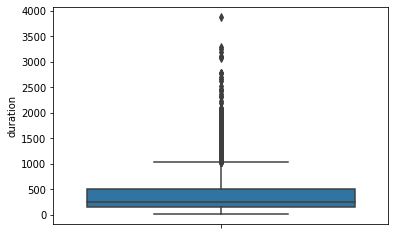

In [784]:
sns.boxplot(y = dataset0.duration)

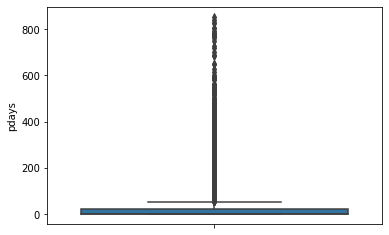

In [785]:
sns.boxplot(y = dataset0.pdays)

As we saw at describe the features balance, duration and pdays had large SD and hence from box plot as well we conclude it contains large no. of outliers which will be removed.

###  Eliminating Outliers 

In [786]:
z_balance = np.abs(stats.zscore(dataset0.balance))
print(z_balance)
type(z_balance)

[0.25252514 0.4599736  0.0801603  ... 0.46493443 0.47392593 0.47392593]


numpy.ndarray

In [787]:
z_duration = np.abs(stats.zscore(dataset0.duration))
print(z_duration)

[1.93022589 3.15461161 2.92990082 ... 0.62225823 1.04575164 0.73753015]


In [788]:
z_pdays = np.abs(stats.zscore(dataset0.pdays))
print(z_pdays)                

[0.48118405 0.48118405 0.48118405 ... 0.48118405 1.10957066 0.48118405]


In [789]:
dataset1 = dataset0.copy()

In [790]:
#Creating new columns for each selected feature containing z-scores
dataset1["z_balance"] = z_balance
dataset1["z_duration"] = z_duration
dataset1["z_pdays"] = z_pdays

In [791]:
dataset1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,z_balance,z_duration,z_pdays
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,0.252525,1.930226,0.481184
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,0.459974,3.154612,0.481184
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,0.080160,2.929901,0.481184
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,0.293762,0.596366,0.481184
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,0.416876,0.867171,0.481184


An entry is considered as an outlier if it's Z-core is greater than 3 and less than -3

In [792]:
dataset_b = dataset1.loc[(dataset1.z_balance > 3) | (dataset1.z_balance < -3)]

In [793]:
dataset_b.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,z_balance,z_duration,z_pdays
170,27,management,single,tertiary,no,12956,yes,no,unknown,29,may,789,3,-1,0,unknown,yes,3.543104,1.201356,0.481184
185,46,management,divorced,tertiary,no,14481,yes,no,unknown,30,may,1269,1,-1,0,unknown,yes,4.015932,2.584192,0.481184
692,42,technician,married,tertiary,no,14282,yes,no,cellular,6,aug,649,4,-1,0,unknown,yes,3.954232,0.798029,0.481184
771,32,technician,single,tertiary,no,34646,no,no,telephone,13,aug,618,9,-1,0,unknown,yes,10.268124,0.708721,0.481184
861,60,unknown,married,unknown,no,17297,no,no,cellular,26,aug,664,11,-1,0,unknown,yes,4.889038,0.841243,0.481184


In [794]:
dataset1.drop(dataset_b.index, axis = 0, inplace = True)

In [795]:
dataset1.iloc[170,:]

age                  30
job              admin.
marital         married
education     secondary
default              no
balance             873
housing             yes
loan                 no
contact         unknown
day                  29
month               may
duration            792
campaign              3
pdays                -1
previous              0
poutcome        unknown
deposit             yes
z_balance      0.203251
z_duration         1.21
z_pdays        0.481184
Name: 171, dtype: object

Outlier is removed corresponding to balance column

In [796]:
dataset.shape

(10621, 28)

In [797]:
dataset1.shape

(10989, 20)

removing outlier from balance column have reduced the data by 173 rows

In [798]:
dataset1.drop("z_balance",axis = 1, inplace = True)

Similarly removing outliers from duration and pdays column  

In [799]:
dataset_d = dataset1.loc[(dataset1.z_duration > 3) | (dataset1.z_duration < -3)]

In [800]:
dataset_d.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,z_duration,z_pdays
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,3.154612,0.481184
11,30,blue-collar,married,secondary,no,309,yes,no,unknown,7,may,1574,2,-1,0,unknown,yes,3.462869,0.481184
12,29,management,married,tertiary,no,199,yes,yes,unknown,7,may,1689,4,-1,0,unknown,yes,3.794173,0.481184
22,43,management,divorced,tertiary,no,388,yes,no,unknown,8,may,2087,2,-1,0,unknown,yes,4.940774,0.481184
33,40,blue-collar,married,secondary,no,10,yes,no,unknown,9,may,1692,2,-1,0,unknown,yes,3.802816,0.481184


In [801]:
dataset1.drop(dataset_d.index, axis = 0, inplace = True)

In [802]:
dataset1.iloc[1,:]

age                   41
job           technician
marital          married
education      secondary
default               no
balance             1270
housing              yes
loan                  no
contact          unknown
day                    5
month                may
duration            1389
campaign               1
pdays                 -1
previous               0
poutcome         unknown
deposit              yes
z_duration        2.9299
z_pdays         0.481184
Name: 2, dtype: object

In [803]:
dataset1.shape

(10792, 19)

In [804]:
dataset1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,z_duration,z_pdays
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1.930226,0.481184
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,2.929901,0.481184
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,0.596366,0.481184
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,0.867171,0.481184
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes,0.547390,0.481184


In [805]:
dataset1.drop("z_duration",axis = 1, inplace = True)

In [806]:
dataset_p = dataset1.loc[(dataset1.z_pdays > 3) | (dataset1.z_pdays < -3)]

In [807]:
dataset_p.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,z_pdays
2267,38,entrepreneur,divorced,secondary,no,1190,yes,no,cellular,4,jun,81,2,391,3,failure,yes,3.123301
2359,40,management,married,tertiary,no,2763,yes,no,cellular,2,jul,566,1,395,2,success,yes,3.160081
2376,41,entrepreneur,married,primary,no,0,no,no,cellular,3,jul,438,2,389,1,other,yes,3.104910
2386,37,services,married,secondary,no,981,no,no,cellular,7,jul,682,2,386,1,success,yes,3.077325
2390,38,unemployed,married,primary,no,7005,yes,no,cellular,7,jul,370,1,412,1,failure,yes,3.316398


In [808]:
dataset1.drop(dataset_p.index, axis = 0, inplace = True)

In [809]:
dataset1.iloc[2267,:]

age                 45
job             admin.
marital        married
education    secondary
default             no
balance            153
housing             no
loan                no
contact       cellular
day                  5
month              aug
duration           277
campaign             1
pdays               -1
previous             0
poutcome       unknown
deposit            yes
z_pdays       0.481184
Name: 2430, dtype: object

In [810]:
dataset1.drop("z_pdays",axis = 1, inplace = True)

In [811]:
dataset1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes


In [812]:
dataset1.shape

(10621, 17)

The dataset have been rightly reduced by removing unwanted outiers

Features contact is a binary feature which does not have any effect on deposit target variable as it only includes whether customer is contacted by cell or telephone.<br>
day of the month wont effect the outcome. <br>
So we will remove both column

In [813]:
dataset1.drop("contact", axis = 1,inplace = True)

In [814]:
dataset1.drop(["day"],axis = 1, inplace = True)

In [815]:
dataset1.head()

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,may,1042,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,may,562,2,-1,0,unknown,yes


In [816]:
dataset1.shape

(10621, 15)

In [817]:
dataset2 = dataset1.copy()

In [818]:
# def func(col):
#     count = col.value_counts()
#     print(count)
#     sum_ = count.sum() - count["unknown"]
#     index = count.index 
#     ratio = [ ]
#     entry_type = [ ]
#     for val in index:
#         if val != "unknown":
#             rat = count[val]/sum_
#             ratio.append(rat)
#             entry_type.append(val)
#     factor = [ ]
#     for val in ratio:
#         x = int(round(count["unknown"]*val))
#     factor.append(x)
#     print(factor)
#     unknown_vals = dataset2.loc[col == "unknown",col]
#     a= 0
#     for i in e_type:
#     #dataset2.loc[dataset2.education == "unknown","education"][a:(a+factor[e_type.index(i)])] = i
#         unknown_vals[a:(a+factor[entry_type.index(i)])] = i
#         a += factor[entry_type.index(i)]
#         dataset2.update(unknown_vals)
#         new_count = col.value_counts()
#         total = col.value_counts().sum()
#         return(new_count,total)

In [819]:
# func(col = dataset2.education)

As discused earlier columns education,job,poutcome had values "unknown". I will replace these values by other remaining values f the column. For that, I will calculate fraction of each unique value to their total and and then convert that fraction of the "unknown: value to that unique value.<br>
for example, if a = 6 , where a is unique value and 6 is the no. of a in the data,similarly, b = 4 <br>c= 9 <br> d = 5 <br> unknown = 3 <br> then the ratio of a(r_a) = 6/(6+4+9+5) = 6/24 = 0.25,similarly, <br> r_b = 0.167 <br> r_c = 0.375 <br> r_d = 0.2 <br> 
total a values (t_a) = round(0.25*3) = 1 and so on.
(The mode is given preference,here a )

In [820]:
edu = dataset2.education.value_counts()
edu

secondary    5227
tertiary     3475
primary      1442
unknown       477
Name: education, dtype: int64

In [821]:
#edu = dataset2.education.value_counts()
sum_ = edu.sum() - edu["unknown"]
index_edu = edu.index 
ratio = [ ]
e_type = [ ]
for val in index_edu:
    if val != "unknown":
        rat = edu[val]/sum_
        ratio.append(rat)
        e_type.append(val)

In [822]:
factor = [ ]
for val in ratio:
    a = int(round(edu["unknown"]*val))
    factor.append(a)
factor

[246, 163, 68]

In [823]:
edu_unknown = dataset2.loc[dataset2.education == "unknown","education"]
a= 0
for i in e_type:
    #dataset2.loc[dataset2.education == "unknown","education"][a:(a+factor[e_type.index(i)])] = i
    edu_unknown[a:(a+factor[e_type.index(i)])] = i
    a += factor[e_type.index(i)]
        

In [824]:
dataset2.update(edu_unknown)

In [825]:
dataset2.education.value_counts()

secondary    5473
tertiary     3638
primary      1510
Name: education, dtype: int64

In [826]:
dataset2.education.value_counts().sum()

10621

The "unknown" values are distributed into "secondary", "tertiary", "primary" values, with mode "secondary" given the prefernce <br>
Similarly

In [827]:
jb = dataset2.job.value_counts()
jb

management       2417
blue-collar      1877
technician       1728
admin.           1275
services          882
retired           743
self-employed     376
student           344
unemployed        334
entrepreneur      314
housemaid         266
unknown            65
Name: job, dtype: int64

In [828]:
sum_ = jb.sum() - jb["unknown"]
index_jb = jb.index 
ratio = [ ]
j_type = [ ]
for val in index_jb:
    if val != "unknown":
        rat = jb[val]/sum_
        ratio.append(rat)
        j_type.append(val)

In [829]:
factor_j = [ ]
for val in ratio:
    a = int(round(jb["unknown"]*val))
    factor_j.append(a)

if sum(factor_j) != jb["unknown"]:
    diff = abs(sum(factor_j) - jb["unknown"])
    factor_j[-1] = factor_j[-1] - diff
    if factor_j[-1] < 0:
        factor_j[-1] = 0
factor_j  

[15, 12, 11, 8, 5, 5, 2, 2, 2, 2, 1]

In [830]:
jb_unknown = dataset2.loc[dataset2.job == "unknown","job"]
a= 0
for i in j_type:
    jb_unknown[a:(a+factor_j[j_type.index(i)])] = i
    a += factor_j[j_type.index(i)]

In [831]:
dataset2.update(jb_unknown)

In [832]:
dataset2.job.value_counts()

management       2432
blue-collar      1889
technician       1739
admin.           1283
services          887
retired           748
self-employed     378
student           346
unemployed        336
entrepreneur      316
housemaid         267
Name: job, dtype: int64

In [833]:
dataset2.education.value_counts().sum()

10621

In [834]:
dataset2.drop("poutcome", axis = 1,inplace = True)

In [835]:
# po = dataset2.poutcome.value_counts()
# po

In [836]:
dataset2.head()

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,may,1042,1,-1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,may,1389,1,-1,0,yes
3,55,services,married,secondary,no,2476,yes,no,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,may,673,2,-1,0,yes
5,42,management,single,tertiary,no,0,yes,yes,may,562,2,-1,0,yes


In [837]:
dataset2.shape

(10621, 14)

### Converting binary variable into numedical variable

In [838]:
def map_binary (col):
    dataset2[col] = dataset2[col].map({"yes":1,"no":0})

In [839]:
map_binary(col = "deposit")

In [840]:
dataset2

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,may,1042,1,-1,0,1
2,41,technician,married,secondary,no,1270,yes,no,may,1389,1,-1,0,1
3,55,services,married,secondary,no,2476,yes,no,may,579,1,-1,0,1
4,54,admin.,married,tertiary,no,184,no,no,may,673,2,-1,0,1
5,42,management,single,tertiary,no,0,yes,yes,may,562,2,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,apr,257,1,-1,0,0
11158,39,services,married,secondary,no,733,no,no,jun,83,4,-1,0,0
11159,32,technician,single,secondary,no,29,no,no,aug,156,2,-1,0,0
11160,43,technician,married,secondary,no,0,no,yes,may,9,2,172,5,0


In [841]:
map_binary(col = "default")

In [842]:
map_binary(col = "housing")

In [843]:
map_binary(col = "loan")

In [844]:
dataset2

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,0,2343,1,0,may,1042,1,-1,0,1
2,41,technician,married,secondary,0,1270,1,0,may,1389,1,-1,0,1
3,55,services,married,secondary,0,2476,1,0,may,579,1,-1,0,1
4,54,admin.,married,tertiary,0,184,0,0,may,673,2,-1,0,1
5,42,management,single,tertiary,0,0,1,1,may,562,2,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,1,0,apr,257,1,-1,0,0
11158,39,services,married,secondary,0,733,0,0,jun,83,4,-1,0,0
11159,32,technician,single,secondary,0,29,0,0,aug,156,2,-1,0,0
11160,43,technician,married,secondary,0,0,0,1,may,9,2,172,5,0


# Numeric column evaluation

In [845]:
# sns.pairplot(dataset2)      #########
# #sns.plt.show()

In [846]:
#plt.plot(dataset2.deposit,dataset2.duration)
dataset2.pivot_table(values = "duration", index = "deposit",aggfunc = "mean")

,duration
deposit,
0,218.253866
1,498.912454


longer the call last greater is the possibility of that customer depositing money

## Histogram of Numerical columns

Text(0.5, 1.0, 'previous')

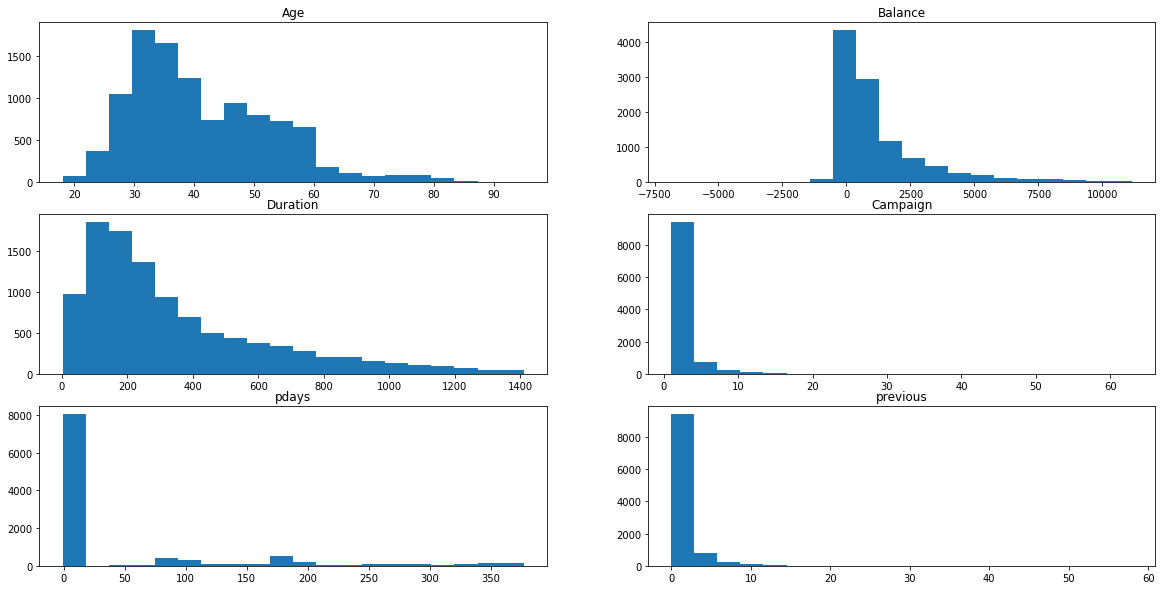

In [847]:
fig,ax = plt.subplots(3,2,figsize = (20,10))
ax[0,0].hist(x = dataset2.age, bins = 20)
ax[0,0].set_title("Age")   
ax[0,1].hist(x = dataset.balance, bins = 20)     
ax[0,1].set_title("Balance")   
ax[1,0].hist(x = dataset2.duration, bins = 20)
ax[1,0].set_title("Duration")   
ax[1,1].hist(x = dataset2.campaign, bins = 20)
ax[1,1].set_title("Campaign")   
ax[2,0].hist(x = dataset2.pdays, bins = 20)
ax[2,0].set_title("pdays")   
ax[2,1].hist(x = dataset2.previous, bins = 20)
ax[2,1].set_title("previous")   


Age: Customer are mainly from the working class with majority from age group 30-40 years <br>
balance: balance is almost normally distributed. <br>
durtion: customer are contacted majorly for 100-250 secs i.e. approx 2-4 minutes, hence they bank needs to really work smart and fast.<br>
campaign: customer are contacted for 2-5 times. <br>
pdays: is widely distributed to the right and max of values lies near 0.<br>
previous: this is closely distributed near 0

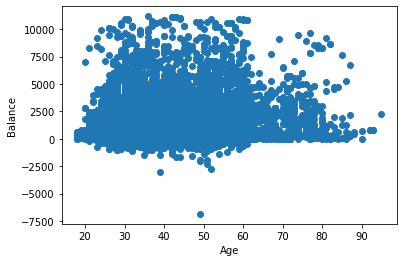

In [848]:
#Relation between Age and Balance
plt.scatter(dataset2.age,dataset2.balance)
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()

There is no clear relationship between customer's age and balance.
And as after retirement i.e after age 60 there is decrease in the balance and it is almost same for everyone in the range 1800 to 2500 units, as Pf is the only source of income mainly, which is constant for everyone in a particular region.

In [849]:
# colour = [ ]
# for i in range(len(dataset2.duration)):
#     if dataset2.deposit == 0:
#         colour = "blue"
#     elif dataset2.deposit == 1:
#         colour = "red"
Colour = pd.DataFrame()
Colour = np.where(dataset2.deposit == 1,'green','blue')    #deposited:green, not_deposited:blue
print(Colour[:10])

['green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green']


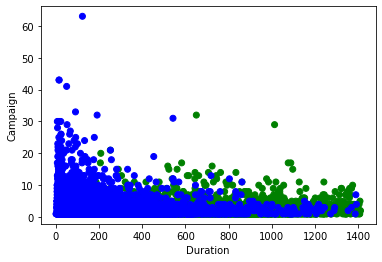

In [850]:
plt.scatter(dataset2.duration,dataset2.campaign,color = Colour)
plt.xlabel("Duration")
plt.ylabel("Campaign")  #no.of calls

plt.show()

It can be seen that as the duration of call increases the possibility of customer deposting increases. Once the customer deposits there is no need to call that customer hence campaign i.e no. of calls is less and no repetitive calling is required. Customer falling on the right side of the plot should be target customer as they require lesser no. of call to deposit.

In [851]:
# plt.plot(dataset2.deposit,dataset2.duration)
# plt.show()

In [852]:
corrmat = dataset2.corr()

In [853]:
#heat_map = sns.heatmap(corrmat,annot = True,cmap = "RdYlGn")                 ###########################

We can see that duration has high relation with deposit, as the longer the contact duration the better the chance of positive response (deposit = 1) from the customer. Other features having high correlation with deposits are balance,pdays,previous,age.

## Categorical Columns Evaluations

In [854]:
#dataset2.plot(x="job", y="deposit", kind='bar',stacked = True,figsize = (20,10), color = ["red", "blue"])
job_deposit_table = dataset2.pivot_table(index = "job",columns = "deposit",aggfunc = "size", fill_value = 0)

In [855]:
job_deposit_table

deposit,0,1
job,,
admin.,699,584
blue-collar,1218,671
entrepreneur,204,112
housemaid,164,103
management,1232,1200
retired,260,488
self-employed,213,165
services,551,336
student,91,255


As we can see that customer involved in management as proffesion had the most contribution to deposit's followed by technician and admin. But no. of them rejecting them is also large.

In [856]:
num = job_deposit_table.iloc[:,1] #.values
num

job
admin.            584
blue-collar       671
entrepreneur      112
housemaid         103
management       1200
retired           488
self-employed     165
services          336
student           255
technician        769
unemployed        183
Name: 1, dtype: int64

In [857]:
den = job_deposit_table.iloc[:,0] #.values
den

job
admin.            699
blue-collar      1218
entrepreneur      204
housemaid         164
management       1232
retired           260
self-employed     213
services          551
student            91
technician        970
unemployed        153
Name: 0, dtype: int64

In [858]:
Success_ratio = num/den
Success_ratio

job
admin.           0.835479
blue-collar      0.550903
entrepreneur     0.549020
housemaid        0.628049
management       0.974026
retired          1.876923
self-employed    0.774648
services         0.609800
student          2.802198
technician       0.792784
unemployed       1.196078
dtype: float64

The people who are retired have greater chance of depositing foallowed by students (unemployed) and others.

In [859]:
marital_deposit_table = dataset2.pivot_table(index = "marital",columns = "deposit",aggfunc = "size", fill_value = 0)
marital_deposit_table

deposit,0,1
marital,,
divorced,664,569
married,3511,2542
single,1580,1755


Married customers have responsibility and mostly they have saving account where they deposit for future. 

In [860]:
month_unique = dataset2.month.unique()
month_unique

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [861]:
data_month = dataset2.month.map({"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12})

In [862]:
dataset2.update(data_month)

In [863]:
dataset2

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,0,2343,1,0,5,1042,1,-1,0,1
2,41,technician,married,secondary,0,1270,1,0,5,1389,1,-1,0,1
3,55,services,married,secondary,0,2476,1,0,5,579,1,-1,0,1
4,54,admin.,married,tertiary,0,184,0,0,5,673,2,-1,0,1
5,42,management,single,tertiary,0,0,1,1,5,562,2,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,1,0,4,257,1,-1,0,0
11158,39,services,married,secondary,0,733,0,0,6,83,4,-1,0,0
11159,32,technician,single,secondary,0,29,0,0,8,156,2,-1,0,0
11160,43,technician,married,secondary,0,0,0,1,5,9,2,172,5,0


In [864]:
camp_month = dataset2.pivot_table(values = "campaign",index = "month",aggfunc = "sum", fill_value = 0)
camp_month

,campaign
month,
1,575
2,1599
3,532
4,1621
5,6409
6,3338
7,4712
8,5092
9,497


In [865]:
month_names = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

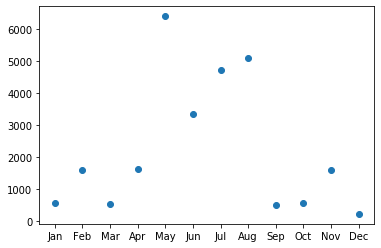

In [866]:
plt.scatter(month_names,camp_month)
# plt.xticks()
plt.show()

Customers are most contacted during the month of May, Aug, Jul and Jun

In [867]:
month_deposit_table = dataset2.pivot_table(index = "month",columns = "deposit",aggfunc = "size", fill_value = 0)
month_deposit_table

deposit,0,1
month,,
1,201,130
2,331,405
3,28,238
4,338,547
5,1876,866
6,664,503
7,876,551
8,811,621
9,42,244


Most of the deposits were done in the month of May, August,July and June, which are also the months during which maximum no. of contacts were made. Hence it concludes no. of deposits is proportional to no. of contacts made.

## Modeling

In [868]:
dataset2

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,0,2343,1,0,5,1042,1,-1,0,1
2,41,technician,married,secondary,0,1270,1,0,5,1389,1,-1,0,1
3,55,services,married,secondary,0,2476,1,0,5,579,1,-1,0,1
4,54,admin.,married,tertiary,0,184,0,0,5,673,2,-1,0,1
5,42,management,single,tertiary,0,0,1,1,5,562,2,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,1,0,4,257,1,-1,0,0
11158,39,services,married,secondary,0,733,0,0,6,83,4,-1,0,0
11159,32,technician,single,secondary,0,29,0,0,8,156,2,-1,0,0
11160,43,technician,married,secondary,0,0,0,1,5,9,2,172,5,0


Converting multiclass categorical columns in numerical columns

In [869]:
dataset3 = pd.get_dummies(dataset2,columns = ["job"])

In [870]:
dataset3

,age,marital,education,default,balance,housing,loan,month,duration,campaign,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,59,married,secondary,0,2343,1,0,5,1042,1,...,0,0,0,0,0,0,0,0,0,0
2,41,married,secondary,0,1270,1,0,5,1389,1,...,0,0,0,0,0,0,0,0,1,0
3,55,married,secondary,0,2476,1,0,5,579,1,...,0,0,0,0,0,0,1,0,0,0
4,54,married,tertiary,0,184,0,0,5,673,2,...,0,0,0,0,0,0,0,0,0,0
5,42,single,tertiary,0,0,1,1,5,562,2,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,single,primary,0,1,1,0,4,257,1,...,1,0,0,0,0,0,0,0,0,0
11158,39,married,secondary,0,733,0,0,6,83,4,...,0,0,0,0,0,0,1,0,0,0
11159,32,single,secondary,0,29,0,0,8,156,2,...,0,0,0,0,0,0,0,0,1,0
11160,43,married,secondary,0,0,0,1,5,9,2,...,0,0,0,0,0,0,0,0,1,0


In [871]:
dataset4 =  pd.get_dummies(dataset3,columns = ["marital"])

In [872]:
dataset5 =  pd.get_dummies(dataset4,columns = ["education"])

In [873]:
dataset5

,age,default,balance,housing,loan,month,duration,campaign,pdays,previous,...,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,59,0,2343,1,0,5,1042,1,-1,0,...,0,0,0,0,0,1,0,0,1,0
2,41,0,1270,1,0,5,1389,1,-1,0,...,0,0,1,0,0,1,0,0,1,0
3,55,0,2476,1,0,5,579,1,-1,0,...,1,0,0,0,0,1,0,0,1,0
4,54,0,184,0,0,5,673,2,-1,0,...,0,0,0,0,0,1,0,0,0,1
5,42,0,0,1,1,5,562,2,-1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,4,257,1,-1,0,...,0,0,0,0,0,0,1,1,0,0
11158,39,0,733,0,0,6,83,4,-1,0,...,1,0,0,0,0,1,0,0,1,0
11159,32,0,29,0,0,8,156,2,-1,0,...,0,0,1,0,0,0,1,0,1,0
11160,43,0,0,0,1,5,9,2,172,5,...,0,0,1,0,0,1,0,0,1,0


In [874]:
dataset5.month = dataset5.month.astype(int)

In [875]:
dataset5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10621 entries, 0 to 11161
Data columns (total 28 columns):
age                    10621 non-null int64
default                10621 non-null int64
balance                10621 non-null int64
housing                10621 non-null int64
loan                   10621 non-null int64
month                  10621 non-null int32
duration               10621 non-null int64
campaign               10621 non-null int64
pdays                  10621 non-null int64
previous               10621 non-null int64
deposit                10621 non-null int64
job_admin.             10621 non-null uint8
job_blue-collar        10621 non-null uint8
job_entrepreneur       10621 non-null uint8
job_housemaid          10621 non-null uint8
job_management         10621 non-null uint8
job_retired            10621 non-null uint8
job_self-employed      10621 non-null uint8
job_services           10621 non-null uint8
job_student            10621 non-null uint8
job_technic

All features have been converted into numeric type for modeling

In [876]:
dataset = dataset5.copy()

In [877]:
len(dataset.columns)

28

# Feature Selection

In [878]:
X = dataset.drop("deposit",axis = 1)

In [879]:
len(X.columns)

27

In [880]:
y = dataset.deposit

In [881]:
# X = np.array(X)
# y = np.array(y)

In [882]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Splitting Data 

In [883]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.3,random_state = 100)

## Model Selection

In [884]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_X,train_y)
Y_pred = logreg.predict(test_X)
acc_log = round(logreg.score(test_X,test_y)*100,2)
print(round(acc_log,2),"%")

C:\Users\Deepthi Poojary\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


78.16 %


In [885]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_X,train_y)
Y_pred = knn.predict(test_X)
acc_knn = round(knn.score(test_X,test_y)*100,2)
print(round(acc_knn,2),"%")

73.61 %


In [886]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(train_X,train_y)
Y_pred = model.predict(test_X)
acc_dt = round(model.score(test_X,test_y)*100,2)
print(round(acc_dt,2),"%")

75.49 %


In [887]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_random = RandomForestClassifier()
model_random.fit(train_X,train_y)
Y_pred = model_random.predict(test_X)
acc_rf = round(model_random.score(test_X,test_y)*100,2)
print(round(acc_rf,2),"%")

C:\Users\Deepthi Poojary\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


80.33 %


In [888]:
# Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(train_X,train_y)
Y_pred = linear_svc.predict(test_X)
acc_svc = round(linear_svc.score(test_X,test_y)*100,2)
print(round(acc_svc,2),"%")

70.94 %


C:\Users\Deepthi Poojary\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Which is the best model

In [889]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest','Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_rf, acc_dt]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
80.33,Random Forest
78.16,Logistic Regression
75.49,Decision Tree
73.61,KNN
70.94,Support Vector Machines


As we can see, the Random Forest classifier goes on the first place. But first, let us check, how random-forest performs, when we use cross validation.

In [890]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf,train_X,train_y, cv=10, scoring = "accuracy")

In [891]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.83467742 0.82258065 0.7983871  0.83467742 0.83870968 0.81695828
 0.82907133 0.81830417 0.83310902 0.80592992]
Mean: 0.8232404976663623
Standard Deviation: 0.012703955554543293


model has a average accuracy of 82.05% with a standard deviation of 1.1 % <br>
The accuracy is really good, we will try to increase it's performance even further.

In [892]:
feature_importance = pd.DataFrame({'feature':train_X.columns,'importance':np.round(model_random.feature_importances_,3)})
feature_importance = feature_importance.sort_values('importance',ascending=False).set_index('feature')

In [893]:
feature_importance

,importance
feature,
duration,0.375
balance,0.112
age,0.098
month,0.093
pdays,0.051
campaign,0.043
previous,0.042
housing,0.038
loan,0.014


job_entrepreneur,job_self-employed,job_unemployed,job_housemaid,default doesn't play a significant role in our random forest classifiers prediction process. Because of that we will drop them from the dataset and train the classifier again.

In [894]:
train_X1 = train_X.drop(["job_entrepreneur","job_self-employed","job_unemployed","job_housemaid","default"],axis = 1)

In [895]:
test_X1 = test_X.drop(["job_entrepreneur","job_self-employed","job_unemployed","job_housemaid","default"],axis = 1)

In [896]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(train_X,train_y)
Y_prediction = random_forest.predict(test_X)

random_forest.score(test_X,test_y)

acc_random_forest = round(random_forest.score(test_X,test_y) * 100, 2)
print(round(acc_random_forest,2,) ,"%")

82.43 %


The accuracy of our model has increased

Now that we have a proper model, we can start evaluating it's performace in a more accurate way. 

# Further Evaluation

## Confusion Matrix

In [897]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, train_X1,train_y, cv=3)
confusion_matrix(train_y, predictions)

array([[3253,  752],
       [ 579, 2850]], dtype=int64)

The first row is about the not-deposited-predictions: 3240 customers were correctly classified as not deposited (called true negatives) and 765 where wrongly classified as not deposited (false negatives).

The second row is about the deposited-predictions: 550 customers where wrongly classified as deposited (false positives) and 2879 where correctly classified as deposited (true positives).

## Precision and Recall

In [898]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(train_y, predictions))
print("Recall:",recall_score(train_y, predictions))

Precision: 0.7912270960577457
Recall: 0.8311461067366579


Our model predicts 79% of the time, a customer deposition correctly (precision). The recall tells us that it predicted the deposition of 83.39 % of the customer who actually deposited.

In [899]:
from sklearn.metrics import f1_score
f1_score(train_y, predictions)


0.8106954913952497

The score is good enough.

# Conclusion
Solutions for the Next Marketing Campaign (Conclusion):

1) Target customer with a higher duration above average duration (2-4 minutes) which gives customer good complete knowledge and clearance of any doubt, hence giving high possibility of depositing.

2) Make as many contacts as possible but not to same customer.

3) Make sure to call a particular customer at max 3 times to get high positive result and to reduce any bitter feeling from customer and to save time and money of bank.

3) Try making contacts to married customers as they have more responsibility of their family's future and use saving account. More over bring better policies for divorced as they have to leave alone and handle their financial conditions on their own which can increase deposit from their end as well.


4) Deposits were made max during month of May to August and was minimum in Jan,Dec,Mar and Oct. Hence contacts care should be taken and strategies should be planned for the Jan,Dec,Mar and Oct.

5) Customer who are retired and students should be targeted more and hence according to age group customer within age group 18 to 20 and above 60 should be contacted as there is more possibility of them depositing.



